In [1]:
#Assignment: 22.1
# Machine Learning=03

In [2]:
# import necessay library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [11]:
# import dataset:
data=sm.datasets.fair.load_pandas().data

## Dataset

The dataset I chose is the [affairs dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) that comes with [Statsmodels](http://statsmodels.sourceforge.net/). It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a [1978 paper](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf) from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs

## Problem Statement

I decided to treat this as a classification problem by creating a new binary variable `affair` (did the woman have at least one affair?) and trying to predict the classification for each woman.


data.head()

In [12]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [13]:
# add new binary affair column on dataset:
# where, 1=represents having affairs, and 0= represents not have affairs:
data["affair"]=(data.affairs>0).astype(int)

In [14]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


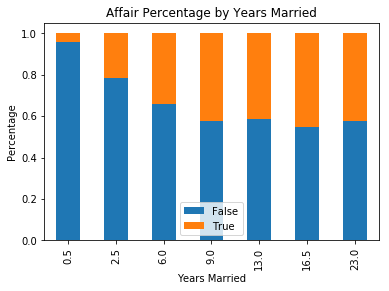

In [20]:
# Let use a stacked barplot to look at the percentage of women having affairs by number of years of 
# Marrriage.
affair_yrs_married=pd.crosstab(data.yrs_married,data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
# if sum(1) is not assign then no bar plot will display
plt.title("Affair Percentage by Years Married")
plt.xlabel("Years Married")
plt.ylabel('Percentage')
plt.legend()

In [21]:
# preparing data for logistic Regression:
#import
from patsy import dmatrices

In [23]:
y,X=dmatrices("affair ~ rate_marriage + age+ yrs_married + children + \
              religious + educ + C(occupation) + C(occupation_husb)",
             data,return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [24]:
# The above columns looks weired , so rename the columns
X=X.rename(columns={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3',
                    'C(occupation)[T.4.0]':'occ_4',
             'C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6',
             'C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3',
             'C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5',
             'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [25]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [28]:
# Flatten y into a 1D array
y=np.ravel(y)
#Return a contiguous flattened array.
y

array([1., 1., 1., ..., 0., 0., 0.])

In [29]:
# Splitting the daaset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)    # no need to write two times fit_transform.just do once that enough


In [32]:
# Fitting Logistic Regression to the Training Set:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)  # random_state is option,Not need to write if you want
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# Predicting the Test Set results:
y_prediction=classifier.predict(X_test)
y_prediction

array([1., 0., 0., ..., 0., 0., 0.])

In [36]:
# Making the confusion Matrix:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_prediction)
cm

array([[1168,  135],
       [ 380,  227]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
acc=accuracy_score(y_test,y_prediction)
clas=classification_report(y_test,y_prediction)
print(acc)
print("\n")
print(clas)

0.7303664921465969


             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [41]:
# generate class probabilities
probs=classifier.predict_proba(X_test)
print(probs)
from sklearn import metrics
print("The ROC AUC FROM PREDICTION SCORES IS : \n")
print(metrics.roc_auc_score(y_test,probs[:,1]))
#Signature: metrics.roc_auc_score(y_true, y_score, average='macro', sample_weight=None)

#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

[[0.34757109 0.65242891]
 [0.91212113 0.08787887]
 [0.72716019 0.27283981]
 ...
 [0.563407   0.436593  ]
 [0.80983872 0.19016128]
 [0.74983613 0.25016387]]
The ROC AUC FROM PREDICTION SCORES IS : 

0.7454309596027922


In [42]:
## Model Evaluation Using Cross-Validation

## Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [43]:
from sklearn.model_selection import cross_val_score

In [47]:
# Evalute the model using 10-fold cross-validation:
scores=cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)# cross-validation(cv=10)
scores,scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [48]:
# The above cells looks good. It's still performing at 73% accuracy.